In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
adv = pd.read_csv('./Data/Advertising.csv',index_col=0)

In [3]:
adv

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


***
Questions we want to answer
1. Is there a relationship between advertising budget and sales? ie any evidence of association between adv expenditure and sales.
2. How strong is the relationship between advertising budget and sales? i.e given a budget can we predict sales with high accuracy?
3. Which media contribute to sales? i.e. be able to decompose contribution of each medium to sales.
4. How accurately can we estimate the effect of each medium on sales?
5. Is the relationship linear? 
6. . Is there synergy among the advertising media? i.e. things like spending 5000 on tv ads and 5000 on Radio ads is better than spending 1000 on tv or rado alone.

2
3


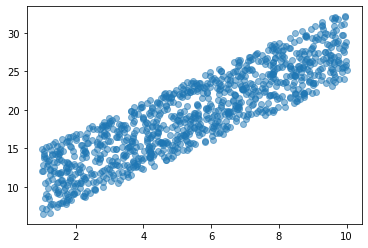

In [29]:
x = np.random.rand(1000)+np.random.randint(1,10,1000)
slope = 2
coef = 3
y = slope*x + coef
y = y+ np.random.rand(1000)+np.random.randint(1,10,1000)
data = pd.DataFrame(x,columns=['x'])
data['y']=y
plt.plot(data['x'],data['y'],'o',alpha=.5)
print(slope)
print(coef)

avg m :  1.970216001000739
avg b :  8.41936693393881


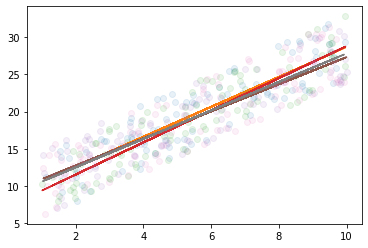

In [26]:
idx = np.random.permutation(len(data))
mt = []
bt = []
for cnt in range(0,1000,300):
    data1= data.iloc[idx[cnt:cnt+100],:]
    plt.plot(data1.x,data1.y,'o',alpha = .1)
    m, b = np.polyfit(data1['x'], data1['y'], 1)
    plt.plot(data1.x, m*data1.x + b)
    mt.append(m)
    bt.append(b)
print('avg m : ',sum(mt)/len(mt))
print('avg b : ',sum(bt)/len(bt))

1.9561722146368317
8.772379035896634


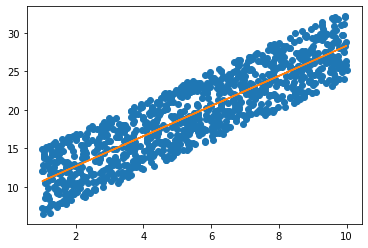

In [33]:
m, b = np.polyfit(data['x'], data['y'], 1)
plt.plot(data.x,data.y,'o')
plt.plot(data.x, m*data.x + b)
print(m)
print(b)

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [37]:
est = smf.ols('y~x',data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     3680.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:36:39   Log-Likelihood:                -2381.4
No. Observations:                1000   AIC:                             4767.
Df Residuals:                     998   BIC:                             4777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7724      0.194     45.315      0.000       8.392       9.152
x              1.9562      0.032     60.665      0.000       1.893       2.019
==============================================================================
Omnibus:                      869.657   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.478
Skew:                           0.052   Prob(JB):                     2.71e-14
Kurtosis:                       1.780   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model1 = smf.ols('Sales~TV',adv).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.47e-42
Time:                        17:39:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

t statistic measures how many standard deviations is β1 away from 0 which is our null hypothesis, and pvalue gives a probaility of β1 = 0. Once we reject the null hypothesis, we would want to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed using two related quantities: the residual standard error (RSE) and the R2 satistic.

0.04753664043301973
7.0325935491276965


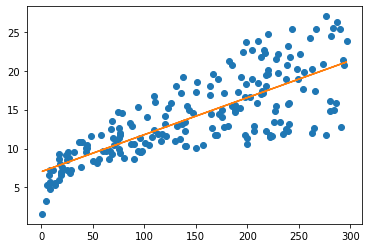

In [43]:
m, b = np.polyfit(adv['TV'], adv['Sales'], 1)
plt.plot(adv['TV'],adv['Sales'],'o')
plt.plot(adv['TV'], m*adv['TV'] + b)
print(m)
print(b)

In [51]:
from sklearn.linear_model import LinearRegression

In [56]:
y =adv.Sales
y.shape

(200,)

In [62]:
linmodel= LinearRegression()
X = adv['TV'].values.reshape(-1,1)
X.shape
y=adv.Sales
y.shape
linmodel.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
linmodel.coef_

array([0.04753664])

In [65]:
linmodel.intercept_

7.032593549127693

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
Sales_pred = linmodel.predict(X)
print(r2_score(y, Sales_pred))
print(mean_squared_error(y, Sales_pred))

0.611875050850071
10.512652915656757


In [107]:
RSE = np.sqrt((sum((y-linmodel.predict(X))**2))/(len(adv)-2))
print('RSE is {:4.2f}'.format(RSE))

RSE is 3.26


actual sales in each market deviate from the true regression line by approximately 3.26 units on avg. if the model were correct and the true values of the unknown coefficients β0 and β1 were known exactly, any prediction of sales on the basis of TV advertising would still be off by about 3.26 units on average.

In [106]:
# Precentage error is 23%
print('error in sales pred would be {:4.2f} %,'.format(RSE/adv.Sales.mean()*100))

error in sales pred would be 23.24 %,


The RSE is considered a measure of the lack of fit of the model to the data. If the predictions obtained using the model are very close to the
true outcome values—that is, if Ypredicted ≈ ytrue for i = 1,...,n—then RSE will be small, and we can conclude that the model fits the data very well. On the other hand, if Ypred is very far from yi for one or more observations, the RSE may be quite large, indicating that the model doesn’t fit the data well.

The RSE provides an absolute measure of lack of fit of the model to the data. But since it is measured in the units of Y, it is not always comparable. The R2 statistic provides an alternative measure of fit. It takes the form of a proportion—the proportion of variance explained—and so it always takes on a value between 0 and 1, and is independent of the scale of Y. An R2 statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates that the regression did not explain much of the variability in the response; this might occur because the linear model is wrong, or the inherent error σ2 is high, or both.

In [88]:
np.corrcoef(adv.TV,adv.Sales)[0,1]**2

0.6118750508500705

sqared corr = Rsquare statistic`m

In [111]:
linmodel.score(X,y)

0.611875050850071

sales = β0 + β1 × TV + β2 × radio + β3 × newspaper + $\epsilon$ 

$\hat{y}$ = $\hat{\beta}_{TV}$ + $\hat{\beta}_{radio}$ + $\hat{\beta}_{newspaper}$

$RSS = \sum_{i=1}^n (y_i - \hat{y_n})^2$

In [138]:
import plotly.graph_objs as go
trace1 = go.Scatter(x = adv.TV,
                    y = adv.Sales,
                    mode = "markers",
                    name = "scatter",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= adv.Sales)
trace2 = go.Line(x = x, y = y,name='reg_line')
data = [trace1,trace2]
layout = dict(title = 'Title',
              xaxis= dict(title= 'TV',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Sales',ticklen= 5,zeroline= False)
             )              
fig = go.Figure(data=data,layout=layout)
fig.show()

In [140]:
adv

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [144]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=adv.TV,
    y=adv.Radio,
    z=adv.Sales,
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=10,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [146]:
est = smf.ols('Sales~TV+Radio+Newspaper',data=adv).fit()

In [148]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        12:22:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
cr = adv.corr()

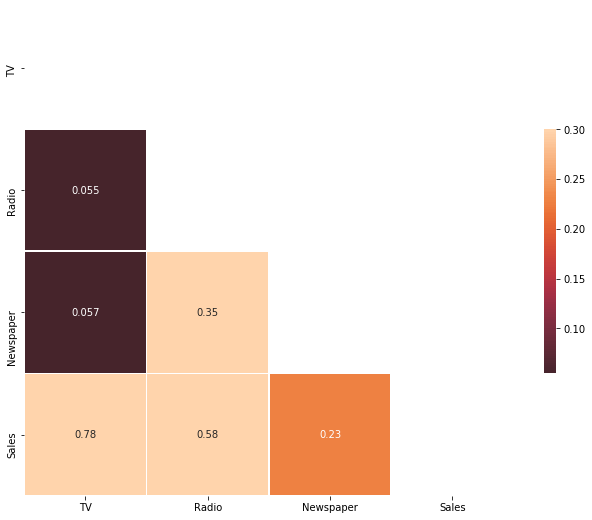

In [165]:
mask = np.triu(np.ones_like(cr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cr, mask=mask, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [166]:
est1 = smf.ols('Sales~Newspaper',data=adv).fit()
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 17 Sep 2020   Prob (F-statistic):            0.00115
Time:                        12:45:32   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

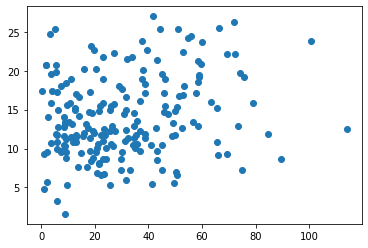

In [171]:
plt.plot(adv.Newspaper,adv.Sales,'o')

So newspaper sales are a surrogate for radio
advertising; newspaper gets “credit” for the effect of radio on sales.

When we perform multiple linear regression, we usually are interested in
answering a few important questions.
1. Is at least one of the predictors X1, X2,...,Xp useful in predicting
the response?
2. Do all the predictors help to explain Y , or is only a subset of the
predictors useful?
3. How well does the model fit the data?
4. Given a set of predictor values, what response value should we predict,
and how accurate is our prediction?

In [174]:
credit = pd.read_csv('./Data/Credit.csv',index_col=0)
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [182]:
est = smf.ols('Balance~Gender',data=credit).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 17 Sep 2020   Prob (F-statistic):              0.669
Time:                        14:09:53   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000     444.675     574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
credit1=credit[['Gender','Balance']]
credit1['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [201]:
credit1.replace(' Male',0,inplace=True)

C:\Users\brk3\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [203]:
credit1['Gender'].value_counts()

0    207
1    193
Name: Gender, dtype: int64

In [204]:
est = smf.ols('Balance~Gender',data=credit1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 17 Sep 2020   Prob (F-statistic):              0.669
Time:                        14:20:23   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    529.5362     31.988     16.554      0.000     466.649     592.423
Gender       -19.7331     46.051     -0.429      0.669    -110.267      70.801
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
credit1.replace([' Male','Female'],[-1,1],inplace=True)
credit1['Gender'].value_counts()

 1    207
-1    193
Name: Gender, dtype: int64

In [211]:
est = smf.ols('Balance~Gender',data=credit1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 17 Sep 2020   Prob (F-statistic):              0.669
Time:                        14:22:30   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    519.6697     23.026     22.569      0.000     474.403     564.937
Gender         9.8666     23.026      0.429      0.669     -35.400      55.134
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
est = smf.ols('Sales~TV+Radio',data=adv).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           4.83e-98
Time:                        18:11:56   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [12]:
y_pred = est.predict(adv[['TV','Radio']])

In [15]:
(adv.Sales - y_pred).sum()

7.887024366937112e-13

In [16]:
est = smf.ols('Sales~TV+Radio+TV*Radio',data=adv).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):          6.68e-146
Time:                        18:19:19   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0